
<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/03_manejo_de_datos-pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas - Continuación

## Combinando Data Frames

In [55]:
import numpy as np
import pandas as pd

### Concat

In [56]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [57]:
Nombres2 = pd.DataFrame({'id':[5,6], 'Nombre': ["Julia", "Alberto"]})
Nombres2

,id,Nombre
0,5,Julia
1,6,Alberto


In [58]:
Nombres = pd.concat([Nombres, Nombres2])

In [59]:
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro
0,5,Julia
1,6,Alberto


### Merge

#### Por una columna

In [60]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [61]:
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})
Edad

,id,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [62]:
pd.merge(Nombres, Edad)

,id,Nombre,Edad
0,1,Ana,11
1,2,Juan,21
2,3,Carolina,8
3,4,Pedro,15


#### Especificando columna común

In [63]:
Nombres = pd.DataFrame({'id_Nombres':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id_edades':[1,2,3,4], 'Edad':[11,21,8,15]})
Nombres

,id_Nombres,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [64]:
Edad

,id_edades,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [65]:
pd.merge(Nombres, Edad, left_on='id_Nombres', right_on='id_edades')

,id_Nombres,Nombre,id_edades,Edad
0,1,Ana,1,11
1,2,Juan,2,21
2,3,Carolina,3,8
3,4,Pedro,4,15


### How (inner, outer, left, right,...)

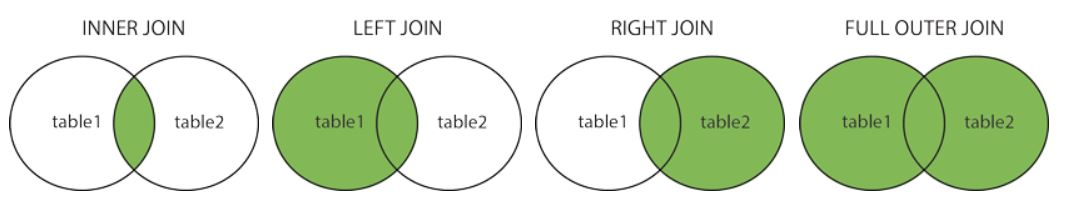

In [66]:
Nombres = pd.DataFrame({'id':[3,4,5,6], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})

Nombres

,id,Nombre
0,3,Ana
1,4,Juan
2,5,Carolina
3,6,Pedro


In [67]:
Edad

,id,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [68]:
pd.merge(Nombres, Edad, how='inner')

,id,Nombre,Edad
0,3,Ana,8
1,4,Juan,15


In [69]:
pd.merge(Nombres, Edad, how='outer')

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN
4,1,NaN,11.0
5,2,NaN,21.0


In [70]:
pd.merge(Nombres, Edad, how='left')

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN


In [71]:
pd.merge(Nombres, Edad, how='right')

,id,Nombre,Edad
0,1,NaN,11
1,2,NaN,21
2,3,Ana,8
3,4,Juan,15


In [72]:
Nombres.join(Edad, on="id", rsuffix="_edad")

,id,Nombre,id_edad,Edad
0,3,Ana,4.0,15.0
1,4,Juan,NaN,NaN
2,5,Carolina,NaN,NaN
3,6,Pedro,NaN,NaN


In [73]:
Nombres.join(Edad.set_index("id"), on="id")

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN


## Agrupaciones



In [74]:
data = pd.read_csv("https://raw.githubusercontent.com/pgaliana/IntroPythonCD/main/data/titanic_train.csv", index_col="PassengerId")

In [75]:
type(data)

pandas.core.frame.DataFrame

In [76]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Puedo usar un agrupador por Columna

In [77]:
data['Survived'].sum()

342

In [78]:
data['Age'].mean()

29.69911764705882

Y también puedo agrupar por fila, por ejemplo, para construir otra columna

In [79]:
# otro modo
# data['NumFam'] = data[['SibSp', 'Parch']].sum(axis=1)

data['NumFam'] = data['SibSp'] + data['Parch']
data[['SibSp', 'Parch','NumFam']].head(10)

,SibSp,Parch,NumFam
PassengerId,,,
1,1,0,1
2,1,0,1
3,0,0,0
4,1,0,1
5,0,0,0
6,0,0,0
7,0,0,0
8,3,1,4
9,0,2,2


In [80]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumFam
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0



### Group By

Las agrupaciones sirven para hacer cálculos sobre subconjuntos de los datos, generalmente tienen tres partes:

1. Definir los grupos
2. Aplicar un cálculo
3. Combinar los resultados

In [81]:
# realiza un agrupamiento del dataframe data por dos variables categóricas:
# "Pclass" (clase del pasajero) y "Sex" (género del pasajero).

agrupado = data.groupby(["Pclass", "Sex"])
agrupado

In [82]:
# Una vez que el dataframe se ha agrupado, se utiliza la función mean() para calcular la media de la variable "Survived" (supervivencia del pasajero)
# dentro de cada grupo creado. En otras palabras, se calcula la proporción de pasajeros sobrevivientes en cada combinación de clase y género.
agrupado.Survived.sum()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [83]:
agrupado.Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [84]:
agrupado.Sex.count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64

In [85]:
agrupado.Survived.agg(
    media="mean", # pandas
    media_2= np.mean,   # numpy
    varianza= "var",
    cantidad= "count",
    cant2= len
)

media   media_2  varianza  cantidad  cant2
Pclass Sex                                                  
1      female  0.968085  0.968085  0.031229        94     94
       male    0.368852  0.368852  0.234724       122    122
2      female  0.921053  0.921053  0.073684        76     76
       male    0.157407  0.157407  0.133870       108    108
3      female  0.500000  0.500000  0.251748       144    144
       male    0.135447  0.135447  0.117439       347    347

In [86]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumFam
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [87]:
data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare', 'Ticket', 'Sex']].mean()

<ipython-input-87-bd068a6ee232>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare', 'Ticket', 'Sex']].mean()


,Age,SibSp,Parch,NumFam,Fare
Survived,,,,,
0,30.626179,0.553734,0.329690,0.883424,22.117887
1,28.343690,0.473684,0.464912,0.938596,48.395408


### Tablas de contingencia

Las tablas de contingencia son similares a las tablas dinámicas de Excel, en el sentido de que permiten visualizar las interacciones entre variables.



In [88]:
pd.crosstab(data.Age.isnull(), data.Survived)

Survived,0,1
Age,,
False,424,290
True,125,52


In [89]:
pd.crosstab(data.Age.isnull(), data.Survived).apply(lambda x: x/x.sum(), axis=0)

Survived,0,1
Age,,
False,0.772313,0.847953
True,0.227687,0.152047


* `pd.crosstab()` toma como argumentos dos series de datos y crea una tabla de frecuencias que muestra la cantidad de veces que se observa cada combinación de valores de las dos series. La primera serie es `data.Age.isnull()`, que es una serie booleana que indica si la edad del pasajero es conocida o no. La segunda serie es `data.Survived`, que indica si el pasajero sobrevivió (1) o no (0).
* Luego, se utiliza el método `apply()` con una función lambda para calcular la proporción de pasajeros que sobrevivieron o murieron en cada grupo de edad conocida o desconocida.
* El argumento `axis=0` indica que la función lambda debe aplicarse a lo largo de las columnas (en este caso, a lo largo de los grupos de edad conocida o desconocida).
* El resultado final es una tabla de contingencia normalizada que muestra la proporción de pasajeros que sobrevivieron o murieron en función de si su edad es conocida o no.
* Nota: Una función **lambda** en Python es una función anónima que se puede crear sin necesidad de definirla formalmente con la sintaxis "def". En cambio, se define utilizando la palabra clave "lambda", seguida de los parámetros de entrada y una expresión que se evalúa y devuelve como resultado.

In [90]:
pd.crosstab(data.Pclass, data.Survived, values=data.Fare, aggfunc=np.mean)

Survived,0,1
Pclass,,
1,64.684007,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


In [91]:
pd.crosstab(pd.qcut(data.Age, 10), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Age,,
"(0.419, 14.0]",0.631579,0.538462
"(14.0, 19.0]",0.783784,0.100000
"(19.0, 22.0]",0.666667,0.108696
"(22.0, 25.0]",0.769231,0.136364
"(25.0, 28.0]",0.722222,0.255814
"(28.0, 31.8]",0.730769,0.175000
"(31.8, 36.0]",0.965517,0.258065
"(36.0, 41.0]",0.681818,0.129032
"(41.0, 50.0]",0.703704,0.235294


In [92]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Age,,
"(0, 10]",0.612903,0.575758
"(10, 20]",0.739130,0.144928
"(20, 30]",0.753086,0.154362
"(30, 40]",0.836364,0.230000
"(40, 50]",0.677419,0.218182
"(50, 60]",0.928571,0.142857
"(60, 70]",1.000000,0.071429
"(70, 80]",NaN,0.200000


## Graficación Simple con plot()

<Axes: title={'center': 'Titanic'}, xlabel='Age'>

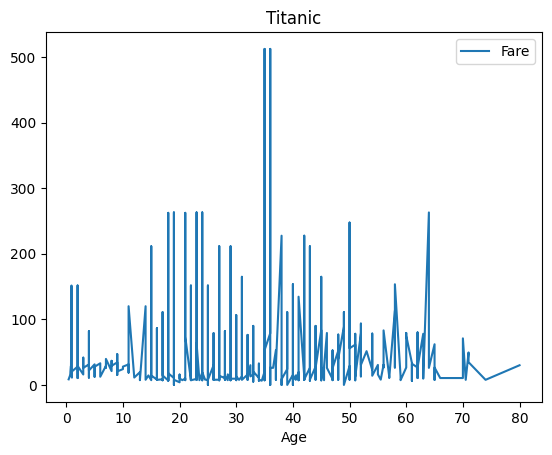

In [93]:
data.sort_values('Age').plot(x = 'Age', y = 'Fare', title='Titanic')

<Axes: xlabel='Age'>

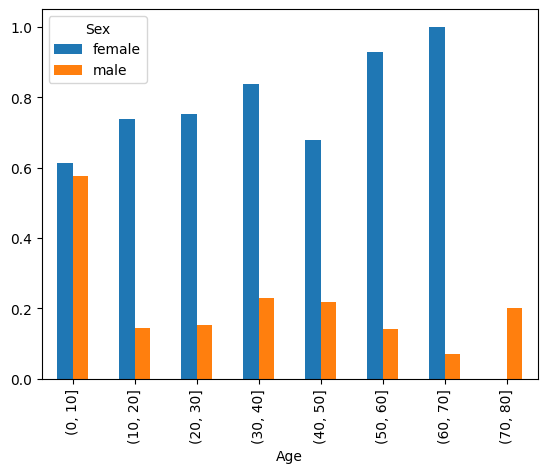

In [94]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean).plot(kind = 'bar')

## Ejercicios

### Combinación de Objetos

Crear los siguientes objetos:

In [95]:
Nombres_1 = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres_2 = pd.DataFrame({'id':[5,6,7,8], 'Nombre': ["Martin", "Lucas", "Julieta", "Pablo"]})
Edad_1 = pd.DataFrame({'id_edades':[3,4,5,6], 'Edad':[11,21,8,15]})

Concatenar los objetos Nombres_1 y Nombres_2 en un objeto llamado Nombres_3

In [96]:
Nombres_3 = pd.concat([Nombres_1, Nombres_2])
Nombres_3

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro
0,5,Martin
1,6,Lucas
2,7,Julieta
3,8,Pablo


Hacer un `merge` de Nombre_3 y Edad_1, quedándonos solo con las filas que coincidan.

In [97]:
Nombres_y_edades_coinc = Nombres_3.merge(Edad_1, left_on='id', right_on='id_edades')
Nombres_y_edades_coinc

,id,Nombre,id_edades,Edad
0,3,Carolina,3,11
1,4,Pedro,4,21
2,5,Martin,5,8
3,6,Lucas,6,15


Hacer un `'merge` de Nombre_3 y Edad_1, quedándonos con todas las filas de Nombre_3.

In [98]:
Nombres_y_edades = Nombres_3.merge(Edad_1, left_on='id', right_on='id_edades', how='left')
Nombres_y_edades

,id,Nombre,id_edades,Edad
0,1,Ana,NaN,NaN
1,2,Juan,NaN,NaN
2,3,Carolina,3.0,11.0
3,4,Pedro,4.0,21.0
4,5,Martin,5.0,8.0
5,6,Lucas,6.0,15.0
6,7,Julieta,NaN,NaN
7,8,Pablo,NaN,NaN


### Agrupaciones

1. ¿Cuál es el precio promedio que se pagó por un ticket en el Titanic? (Fare)

In [99]:
precio_promedio = data['Fare'].mean()
print('El precio promedio del ticket en el Titanic fue de:', precio_promedio)

El precio promedio del ticket en el Titanic fue de: 32.204207968574636


2. ¿Cuál es el precio promedio que se pagó en cada categoría? (Pclass)

In [100]:
promedio_por_categoria = data.groupby("Pclass")["Fare"].mean()
print(promedio_por_categoria)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


3. Construir una tabla de contingencia usando sexo (Sex) y categoría (Pclass) para calcular el porcentaje de supervivencia.

In [101]:
pd.crosstab(data['Sex'], data['Pclass'], values=data['Survived'], aggfunc=np.mean).applymap(lambda x: '{:.2%}'.format(x))

Pclass,1,2,3
Sex,,,
female,96.81%,92.11%,50.00%
male,36.89%,15.74%,13.54%


4. Construir una tabla de contingencia usando el sexo y el precio del ticket en 5 rangos para calcular el porcentaje de supervivencia.

In [102]:
# Crear una nueva columna con la categoría del precio del ticket
data['Fare_Range'] = pd.qcut(data['Fare'], 5)

# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['Sex'], data['Fare_Range'], values=data['Survived'], aggfunc=np.mean)

# Mostrar la tabla de contingencia
print(contingency_table)

Fare_Range  (-0.001, 7.854]  (7.854, 10.5]  (10.5, 21.679]  (21.679, 39.688]  \
Sex                                                                            
female             0.684211       0.527778        0.701299          0.685714   
male               0.092199       0.121622        0.200000          0.290909   

Fare_Range  (39.688, 512.329]  
Sex                            
female               0.924731  
male                 0.325301  


5. Graficar el porcentaje de supervivencia por categoría y sexo

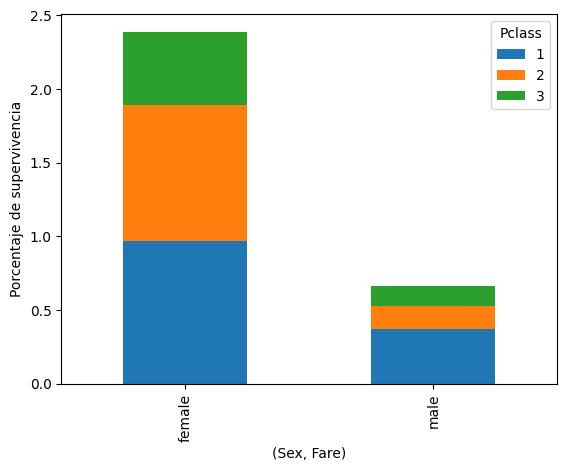

In [103]:
import matplotlib.pyplot as plt

# Crear tabla de contingencia
ct = pd.crosstab(data['Sex'], data['Pclass'], values=data['Survived'], aggfunc=np.mean)

# Graficar
ax = ct.plot.bar(stacked=True)
ax.set_xlabel('(Sex, Fare)')
ax.set_ylabel('Porcentaje de supervivencia')
plt.show()

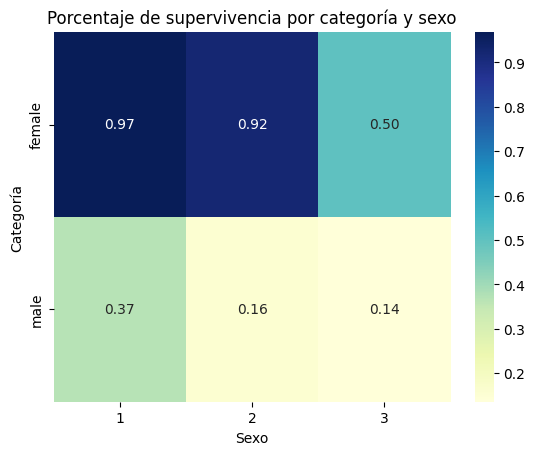

In [104]:
# seaborn
import seaborn as sns

sns.heatmap(ct, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Porcentaje de supervivencia por categoría y sexo')
plt.xlabel('Sexo')
plt.ylabel('Categoría')
plt.show()

In [105]:
# Plotly

import plotly.express as px

ct = pd.crosstab(data.Pclass, data.Sex, values=data.Survived, aggfunc=np.mean)

# Crear figura interactiva
fig = px.bar(ct, x=ct.index, y=["female", "male"], barmode="group",
             title="Porcentaje de supervivencia por categoría y sexo")

# Agregar etiquetas de ejes
fig.update_xaxes(title_text="Categoría")
fig.update_yaxes(title_text="Porcentaje de supervivencia")

# Mostrar figura
fig.show()